# Assignment-04-Simple Linear Regression-2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [2]:
salary = pd.read_csv("C:/Users/BASHAR/OneDrive/Documents/Data Science/Assignment/Assignment - 4/Salary_Data.csv")
salary

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
salary = salary.rename({"YearsExperience" : "Y_Experience"}, axis=1)
salary

,Y_Experience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


# EDA and Data Visualization

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Y_Experience  30 non-null     float64
 1   Salary        30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y_Experience', ylabel='Density'>

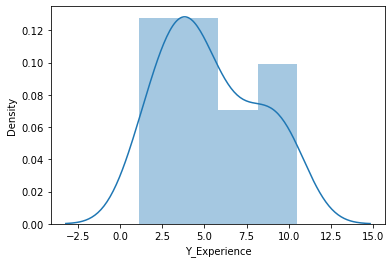

In [5]:
sns.distplot(salary["Y_Experience"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

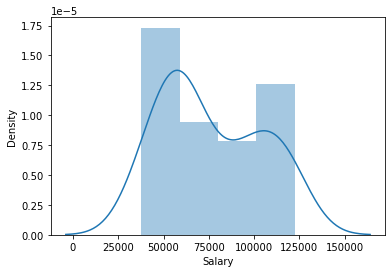

In [6]:
sns.distplot(salary["Salary"])

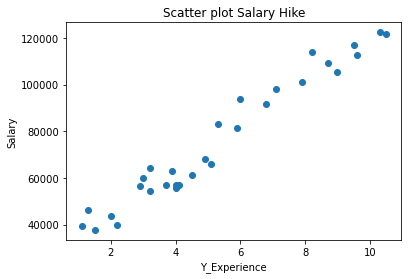

In [8]:
plt.scatter(x="Y_Experience", y="Salary", data=salary)
plt.title('Scatter plot Salary Hike')
plt.xlabel('Y_Experience')
plt.ylabel('Salary')
plt.show()

<AxesSubplot:>

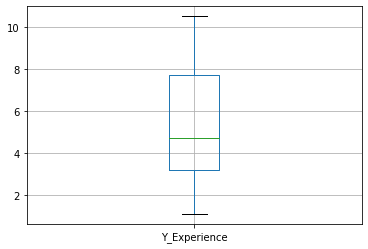

In [9]:
salary.boxplot(column=['Y_Experience'])

<AxesSubplot:>

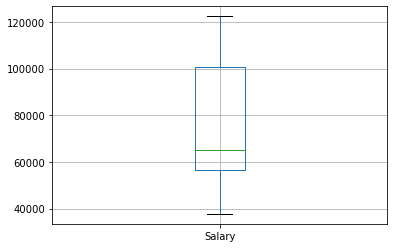

In [10]:
salary.boxplot(column=['Salary'])

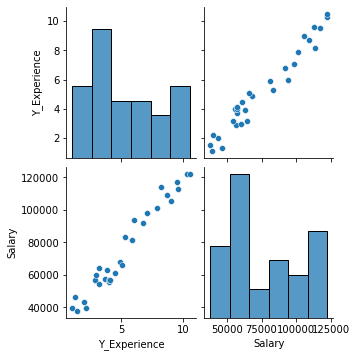

In [11]:
sns.pairplot(salary)

# Correlation Analysis

In [12]:
salary.corr()

,Y_Experience,Salary
Y_Experience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='Y_Experience', ylabel='Salary'>

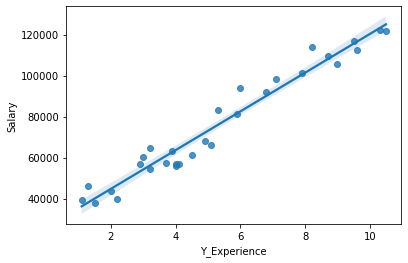

In [13]:
sns.regplot(x="Y_Experience", y="Salary", data=salary)

# Model Building
# 1 - No Tranformation

In [15]:
x= salary["Y_Experience"]
y= salary["Salary"]

In [16]:
model_1 = sm.ols("y~x", data=salary).fit()
model_1.predict(salary)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [17]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           1.14e-20
Time:                        12:05:45   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2 - Log Transformation of X

In [18]:
log_x = np.log(x)
model_2 = sm.ols("y~log_x", data=salary).fit()
model_2.predict(salary)

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [19]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           3.25e-13
Time:                        12:06:50   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_x       4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3 - Log Transformation of y

In [20]:
log_y = np.log(y)
model_3 = sm.ols("log_y~x", data=salary).fit()
model_3.predict(salary)

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [21]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           7.03e-18
Time:                        12:07:43   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
x              0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4 - Log Transformation of x and y

In [22]:
model_4 = sm.ols("log_y~log_x", data=salary).fit()
model_4.predict(salary)

0     10.381616
1     10.475515
2     10.555951
3     10.717653
4     10.771226
5     10.926505
6     10.945561
7     10.981837
8     10.981837
9     11.063442
10    11.093033
11    11.107264
12    11.107264
13    11.121143
14    11.173468
15    11.221335
16    11.243821
17    11.265443
18    11.325724
19    11.335171
20    11.405524
21    11.429791
22    11.489804
23    11.510753
24    11.544023
25    11.563079
26    11.593469
27    11.599355
28    11.638915
29    11.649725
dtype: float64

In [23]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           7.40e-16
Time:                        12:08:37   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
log_x          0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5 - Sq Root Transformation of x

In [24]:
x_sqrt = np.sqrt(x)
model_5 = sm.ols("y~x_sqrt", data=salary).fit()
model_5.predict(salary)

0      27470.511884
1      31262.287009
2      34771.976586
3      42635.056211
4      45499.687794
5      54617.343293
6      55825.518202
7      58182.905200
8      58182.905200
9      63772.383867
10     65901.508208
11     66945.592049
12     66945.592049
13     67976.704394
14     71980.468875
15     75809.903446
16     77665.963118
17     79485.972499
18     84749.033766
19     85599.722290
20     92164.765553
21     94526.218887
22    100589.939171
23    102784.094601
24    106353.652306
25    108446.272632
26    111857.919142
27    112529.386687
28    117134.909368
29    118421.805716
dtype: float64

In [25]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           8.57e-18
Time:                        12:09:16   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
x_sqrt       4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 6 - Sq Root Transformation of y

In [26]:
y_sqrt = np.sqrt(y)
model_6 = sm.ols("y_sqrt~x", data=salary).fit()
model_6.predict(salary)

0     199.462407
1     202.873713
2     206.285019
3     214.813286
4     218.224592
5     230.164164
6     231.869818
7     235.281124
8     235.281124
9     243.809390
10    247.220696
11    248.926350
12    248.926350
13    250.632003
14    257.454616
15    264.277228
16    267.688535
17    271.099841
18    281.333761
19    283.039414
20    296.684639
21    301.801599
22    315.446825
23    320.563784
24    329.092050
25    334.209010
26    342.737276
27    344.442929
28    356.382502
29    359.793808
dtype: float64

In [27]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_sqrt   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           9.78e-20
Time:                        12:09:57   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    180.7002      4.446     40.646      0.000     171.594     189.807
x             17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7 - Sq Root Transformation of x and y

In [28]:
model_7 = sm.ols("y_sqrt~x_sqrt", data=salary).fit()
model_7.predict(salary)

0     182.886226
1     189.796000
2     196.191728
3     210.520663
4     215.740898
5     232.356055
6     234.557719
7     238.853599
8     238.853599
9     249.039339
10    252.919254
11    254.821894
12    254.821894
13    256.700896
14    263.996980
15    270.975381
16    274.357689
17    277.674303
18    287.265210
19    288.815425
20    300.778941
21    305.082231
22    316.132184
23    320.130606
24    326.635432
25    330.448826
26    336.665890
27    337.889509
28    346.282180
29    348.627298
dtype: float64

In [29]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_sqrt   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           7.58e-19
Time:                        12:10:39   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.5680      8.178     12.663      0.000      86.815     120.321
x_sqrt        75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 8 Reciprocal transformation of x

In [30]:
rec_x = 1/x
model_8 = sm.ols("y~rec_x", data=salary).fit()
model_8.predict(salary)

0     10072.567925
1     24564.993646
2     35192.772508
3     52462.913159
4     57172.951518
5     68542.009627
6     69733.053810
7     71891.821391
8     71891.821391
9     76267.701624
10    77703.887956
11    78368.124135
12    78368.124135
13    78999.958549
14    81246.480910
15    83126.224110
16    83955.522581
17    84722.232488
18    86710.480212
19    87003.194461
20    89034.975714
21    89678.850054
22    91156.772592
23    91636.646830
24    92362.893283
25    92759.908011
26    93365.877858
27    93479.497205
28    94213.059004
29    94404.683311
dtype: float64

In [31]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     40.06
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           7.58e-07
Time:                        12:11:19   Log-Likelihood:                -335.30
No. Observations:                  30   AIC:                             674.6
Df Residuals:                      28   BIC:                             677.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.043e+05   5533.996     18.842      0.000    9.29e+04    1.16e+05
rec_x      -1.036e+05   1.64e+04     -6.329      0.000   -1.37e+05   -7.01e+04
==============================================================================
Omnibus:                       10.284   Durbin-Watson:                   0.220
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                2.740
Skew:                           0.290   Prob(JB):                        0.254
Kurtosis:                       1.638   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 9 Reciprocal transformation of y

In [32]:
rec_y = 1/y
model_9 = sm.ols("rec_y~x", data=salary).fit()
model_9.predict(salary)

0     0.000023
1     0.000022
2     0.000022
3     0.000021
4     0.000021
5     0.000019
6     0.000019
7     0.000019
8     0.000019
9     0.000018
10    0.000018
11    0.000017
12    0.000017
13    0.000017
14    0.000016
15    0.000016
16    0.000015
17    0.000015
18    0.000014
19    0.000014
20    0.000012
21    0.000012
22    0.000010
23    0.000010
24    0.000009
25    0.000008
26    0.000007
27    0.000007
28    0.000006
29    0.000006
dtype: float64

In [33]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  rec_y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     173.2
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           1.63e-13
Time:                        12:11:50   Log-Likelihood:                 350.83
No. Observations:                  30   AIC:                            -697.7
Df Residuals:                      28   BIC:                            -694.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.454e-05    8.2e-07     29.913      0.000    2.29e-05    2.62e-05
x          -1.799e-06   1.37e-07    -13.162      0.000   -2.08e-06   -1.52e-06
==============================================================================
Omnibus:                        1.760   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.380
Skew:                           0.516   Prob(JB):                        0.502
Kurtosis:                       2.802   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 10 Reciprocal transformation of x and y

In [35]:
model_10 = sm.ols("rec_y~rec_x", data=salary).fit()
model_10.predict(salary)

0     0.000030
1     0.000027
2     0.000024
3     0.000020
4     0.000019
5     0.000017
6     0.000016
7     0.000016
8     0.000016
9     0.000015
10    0.000015
11    0.000014
12    0.000014
13    0.000014
14    0.000014
15    0.000013
16    0.000013
17    0.000013
18    0.000013
19    0.000012
20    0.000012
21    0.000012
22    0.000012
23    0.000011
24    0.000011
25    0.000011
26    0.000011
27    0.000011
28    0.000011
29    0.000011
dtype: float64

In [36]:
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  rec_y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     93.95
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           1.91e-10
Time:                        12:13:31   Log-Likelihood:                 343.31
No. Observations:                  30   AIC:                            -682.6
Df Residuals:                      28   BIC:                            -679.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.488e-06    8.3e-07     10.227      0.000    6.79e-06    1.02e-05
rec_x        2.38e-05   2.46e-06      9.693      0.000    1.88e-05    2.88e-05
==============================================================================
Omnibus:                        0.611   Durbin-Watson:                   0.662
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.657
Skew:                           0.075   Prob(JB):                        0.720
Kurtosis:                       2.290   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 11 Exponential Tanformation of x

In [37]:
exp_x = x**(1/5)
model_11 = sm.ols("y~exp_x", data=salary).fit()
model_11.predict(salary)

0      22113.737641
1      27571.351643
2      32393.631286
3      42515.873861
4      45999.913164
5      56481.735994
6      57808.410084
7      60359.002486
8      60359.002486
9      66218.429445
10     68385.470977
11     69435.813479
12     69435.813479
13     70465.354801
14     74392.733927
15     78050.050029
16     79789.803073
17     81475.803916
18     86245.516703
19     87002.324681
20     92719.028993
21     94724.303748
22     99758.495068
23    101541.336258
24    104400.031238
25    106052.710199
26    108711.749102
27    109230.062068
28    112742.110725
29    113710.399451
dtype: float64

In [38]:
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     229.3
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           5.14e-15
Time:                        12:14:07   Log-Likelihood:                -315.35
No. Observations:                  30   AIC:                             634.7
Df Residuals:                      28   BIC:                             637.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.385e+05   1.43e+04     -9.711      0.000   -1.68e+05   -1.09e+05
exp_x       1.576e+05   1.04e+04     15.144      0.000    1.36e+05    1.79e+05
==============================================================================
Omnibus:                        0.572   Durbin-Watson:                   0.670
Prob(Omnibus):                  0.751   Jarque-Bera (JB):                0.643
Skew:                           0.092   Prob(JB):                        0.725
Kurtosis:                       2.307   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 12 Exponential Tanformation of y

In [39]:
exp_y = y**(1/5)
model_12 = sm.ols("exp_y~x", data=salary).fit()
model_12.predict(salary)

0      8.376201
1      8.423334
2      8.470466
3      8.588298
4      8.635431
5      8.800396
6      8.823962
7      8.871095
8      8.871095
9      8.988927
10     9.036059
11     9.059626
12     9.059626
13     9.083192
14     9.177458
15     9.271723
16     9.318856
17     9.365989
18     9.507387
19     9.530953
20     9.719484
21     9.790184
22     9.978715
23    10.049414
24    10.167246
25    10.237945
26    10.355777
27    10.379343
28    10.544308
29    10.591440
dtype: float64

In [40]:
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  exp_y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     442.6
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           1.07e-18
Time:                        12:15:37   Log-Likelihood:                 11.416
No. Observations:                  30   AIC:                            -18.83
Df Residuals:                      28   BIC:                            -16.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1170      0.067    120.743      0.000       7.979       8.255
x              0.2357      0.011     21.038      0.000       0.213       0.259
==============================================================================
Omnibus:                        1.603   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.449   Jarque-Bera (JB):                1.290
Skew:                           0.317   Prob(JB):                        0.525
Kurtosis:                       2.207   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 13 Exponential Tanformation of x and y

In [41]:
model_13 = sm.ols("exp_y~exp_x", data=salary).fit()
model_13.predict(salary)

0      7.989630
1      8.129339
2      8.252783
3      8.511901
4      8.601088
5      8.869410
6      8.903371
7      8.968663
8      8.968663
9      9.118658
10     9.174131
11     9.201019
12     9.201019
13     9.227374
14     9.327910
15     9.421533
16     9.466069
17     9.509228
18     9.631327
19     9.650700
20     9.797041
21     9.848374
22     9.977243
23    10.022882
24    10.096061
25    10.138368
26    10.206436
27    10.219704
28    10.309608
29    10.334395
dtype: float64

In [42]:
model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  exp_y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     335.2
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           4.07e-17
Time:                        12:16:18   Log-Likelihood:                 7.5289
No. Observations:                  30   AIC:                            -11.06
Df Residuals:                      28   BIC:                            -8.255
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8776      0.302     12.837      0.000       3.259       4.496
exp_x          4.0344      0.220     18.308      0.000       3.583       4.486
==============================================================================
Omnibus:                        0.183   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.913   Jarque-Bera (JB):                0.390
Skew:                           0.075   Prob(JB):                        0.823
Kurtosis:                       2.461   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Output Interpretation